In [1]:
# Load library
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline  
from  matplotlib import style

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
# read tweet files and create a pandas df
df = pd.read_csv("tweets/portland_tweets.csv", encoding="latin1")
df2 = pd.read_csv("dfs.csv", encoding="latin1")
df3 = pd.DataFrame(df2)

In [3]:
# make an object that contains tweet len
tw_len = df.tweet.str.len()
tw_len.head()

0    103
1    129
2     83
3     85
4    113
Name: tweet, dtype: int64

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


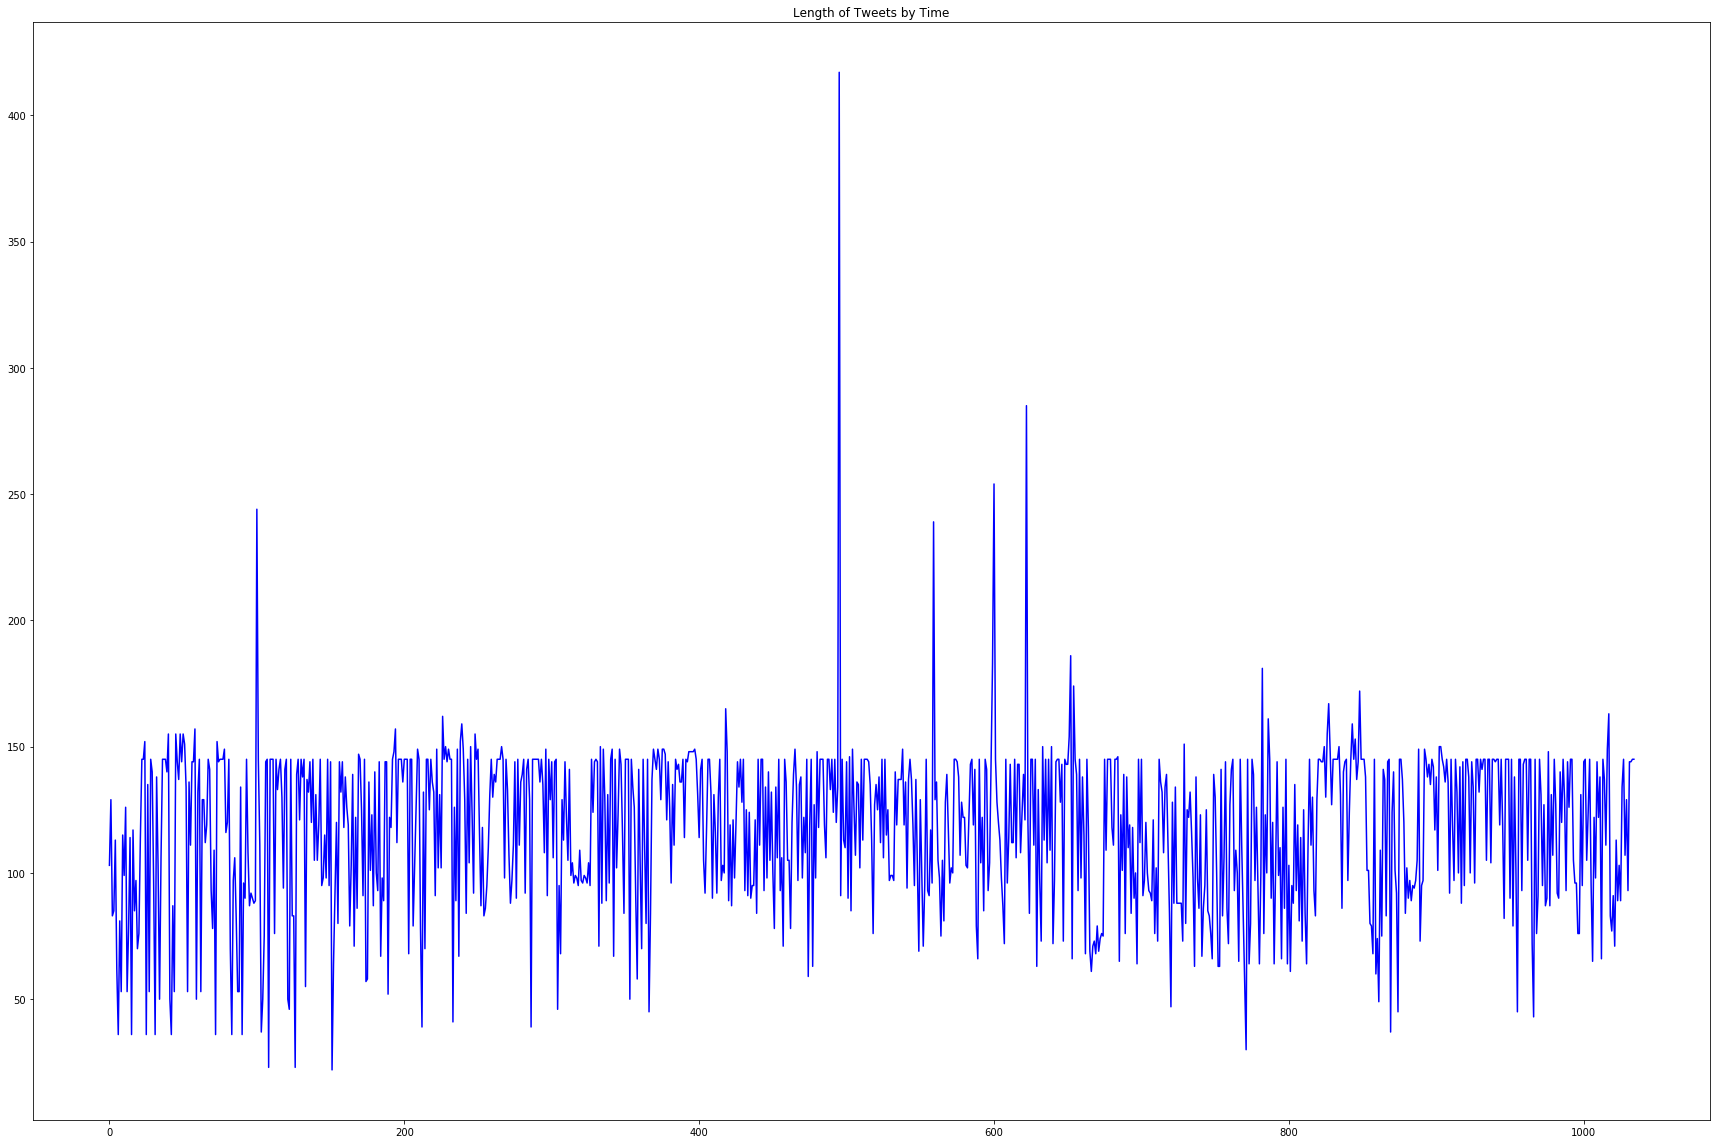

In [4]:
# plot tweet len 
tw_len_s = pd.Series(tw_len)
tw_len_s.plot(figsize=(24,16), color='b', title="Length of Tweets by Time")
plt.show()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


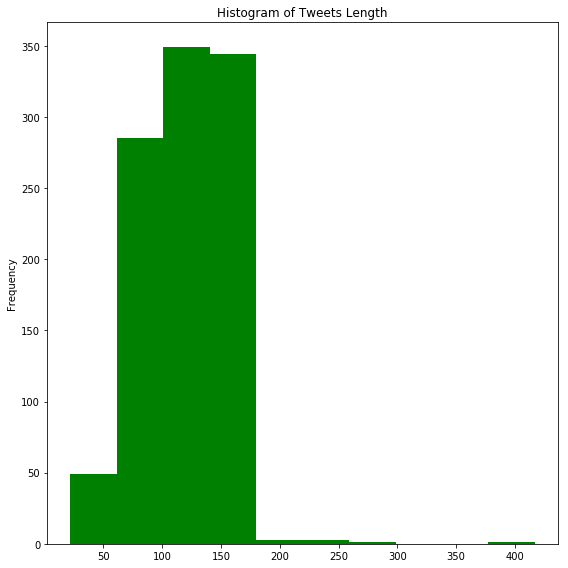

In [5]:
# print hist for tweet len
tw_len_s.plot.hist(figsize=(8,8), color='g', title="Histogram of Tweets Length")

count    1035.000000
mean      117.346860
std        32.621273
min        22.000000
25%        95.000000
50%       124.000000
75%       145.000000
max       417.000000
Name: tweet, dtype: float64


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


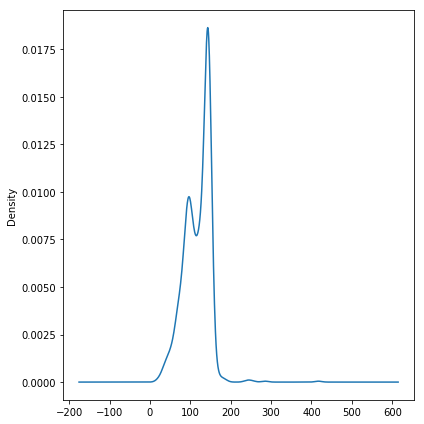

In [6]:
# print density plot of tweet len and summary 
tw_len.plot.density(figsize=(6,6))
print(tw_len.describe())

In [7]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
from os import path
from scipy.misc import imread
import random
from wordcloud import WordCloud, STOPWORDS

In [8]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [9]:
# make a list of unique values for the name column 
unique_name = df2.name.unique()
unique_name = unique_name.tolist()

In [10]:
stop_words = {'drinking','by','at','for','our','the','rt','to','of','and','in','austin','brewing','what',
    'with','http','brewer','brewery','see','https','now','available','or','it','co','beer','is','you','my',
    'is','thi','an','this','on','your','get','that','we','denver','from','just','sa','san','diego','are',
    '@','#','drinking','amp','https','co','rt','new','breckbrew','greatdividebrew','10barrelbrewing',
    'denverbeerco','hogsheadbrewery','cerebralbrewing','indybrewing','blueowlbrewing','512brewing','cascadebrewing',
    'offcolorbrewing','begylebrewing','pipeworksbrewin','chicago','portland','seattle','pikebrewing','stoupbrewing',
    'elysianbrewing','bjsrestaurants','halfdoorbrewing','alesmithbrewing'}


In [11]:
# add the unique list to existing stop words
unique_name.extend(stop_words)

In [12]:
# summary of unique tweets
df.tweet.describe()

count                                                  1035
unique                                                  981
top       RT @HillsboroHops: We're on the road for a whi...
freq                                                      6
Name: tweet, dtype: object

In [13]:
# make a df of unique tweets
unique_tweet = df.tweet.unique()
unique_tweet.tolist()
unique_df = pd.DataFrame(unique_tweet)
unique_df.columns = ["unique_tweets"]
print(unique_df.head())

                                       unique_tweets
0  jalapeÃÂ±os - Drinking a Peppered Gold by @Ca...
1  R.I.P. Tower Records - Drinking a Foggy Grove ...
2  @CaptainNeon I'm back for the 2nd straight day...
3  @BubbaLewis2717 @notaxation @dagan1973 @Captai...
4  "Some of the looks from a British facial hair ...


In [14]:
# convert df to string and lower case
unique_str = unique_df.to_string()
unique_str2 = unique_str.lower()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


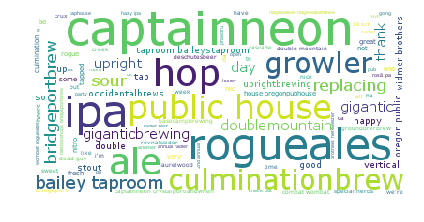

In [15]:
#create a wordclouds for string objects
dfbrew_wc2 = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                       background_color='white',
                       max_font_size=50,
                       max_words=100,
                       relative_scaling = .50,
                      stopwords = unique_name
                      ).generate(unique_str2)
plt.imshow(dfbrew_wc2)
plt.axis("off")
plt.show()

In [16]:
# import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

In [17]:
# list of stop words and an update to that list
stop = set(stopwords.words('english'))
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '@', '#', 'rt', 'amp',
             'http', 'https', '/', '://', '_', 'co', 'drinking', 'beer', 'â', 'ã', 'gt', 'denver', 'colorado',
            'brewery', 'texas', 'chicago', 'portland', 'austin', 'seattle', 'beers', 'san', 'diego'])


In [18]:
# frequency count of unique tweets
series_tweets = unique_df['unique_tweets']
tweet_str = series_tweets.str.cat(sep = ' ')
list_of_words = [i.lower() for i in wordpunct_tokenize(tweet_str) if i.lower() not in stop and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('replacing', 230), ('captainneon', 99), ('ipa', 98), ('rogueales', 93), ('giganticbrewing', 76), ('cascadebrewing', 73), ('culminationbrew', 68), ('uprightbrewing', 61), ('bridgeportbrew', 55), ('doublemountain', 55), ('ale', 50), ('new', 42), ('house', 40), ('mountain', 40), ('double', 39), ('stormbreakerpdx', 39), ('rogue', 37), ('sour', 35), ('hop', 35), ('hazy', 34), ('hefeweizen', 34), ('widmer', 32), ('brothers', 31), ('gigantic', 30), ('upright', 29), ('brewing', 28), ('taproom', 27), ('laurelwood', 27), ('occidentalbrews', 26), ('stout', 25), ('deschutesbeer', 25), ('culmination', 25), ('deschutespdxpub', 24), ('mcmenamins', 22), ('oregon', 22), ('red', 22), ('oregonpubhouse', 22), ('radler', 22), ('nitro', 21), ('us', 20), ('public', 20), ('revnatscider', 20), ('bailey', 20), ('groundbrkrbrew', 20), ('thanks', 19), ('taphouse', 19), ('dead', 19), ('peach', 19), ('basecampbrewing', 19), ('summer', 18)]


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


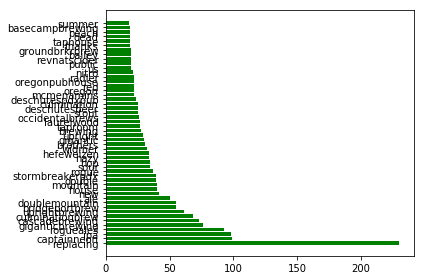

In [19]:
# distribution of tweet words for most common
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center', color='green')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

In [20]:
# print source column summary 
df.source.describe()

count        1035
unique         34
top       Untappd
freq          331
Name: source, dtype: object

In [22]:
# inspect tweet 270
df.tweet[270:271]

270    Oh, this radler is sooo good! - Drinking an Or...
Name: tweet, dtype: object

In [23]:
# import matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


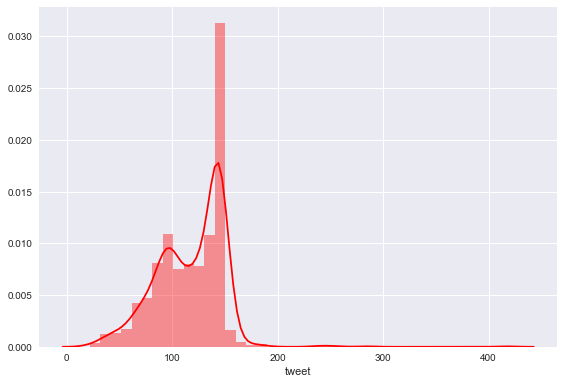

In [24]:
# plot a distplot using seaborn
sns.distplot(tw_len_s, color="r")